# Caution: ***you have to set GPU as V100 High-RAM***
the process requires 15.3GB GPU RAM to train models


[original colab notebook(custom training yolov8 x roboflow)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb)

# more training 150 epochs (50 training + 100 mozaic) from v3_epoc00


## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Dec 17 06:52:40 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.2/166.8 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

In [11]:
!pip install roboflow
from roboflow import Roboflow

## redo after runtime reset

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.4/166.8 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## download datasets and pretrained model

**change under the path into your pretrained_model path**

In [4]:
!pip install gdown

In [9]:
%cd /content
!gdown https://drive.google.com/uc?id=1ouz9FOUgxWT2xT0h1DvMuO0SY2VMJPfX  # v3_00 pretrained model # dataset is already included

/content
Downloading...
From: https://drive.google.com/uc?id=1ouz9FOUgxWT2xT0h1DvMuO0SY2VMJPfX
To: /content/v3_00_pretrained_model.zip
100% 2.84G/2.84G [00:13<00:00, 215MB/s]


In [11]:
!unzip /content/v3_00_pretrained_model.zip -d /content | tail -n 1

  inflating: /content/datasets/trademark-logo-detection-3/train/images/1000541471_jpg.rf.2cd37f03d439e4643dc574fd2861397c.jpg  


## Custom Training

In [7]:
# !mkdir {HOME}/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists


In [12]:
%cd {HOME}
!yolo task=detect mode=train model=/content/runs/detect/train/weights/last.pt data=/content/trademark-logo-detection-3/data.yaml epochs=150 batch=64 imgsz=640 close_mosaic=100 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/trademark-logo-detection-3/data.yaml, epochs=150, patience=50, batch=64, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=100, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int

In [13]:
!ls {HOME}/runs/detect/train2

args.yaml					    results.csv       train_batch1.jpg	weights
events.out.tfevents.1702797445.4cfe226dc45e.6685.0  train_batch0.jpg  train_batch2.jpg


/content


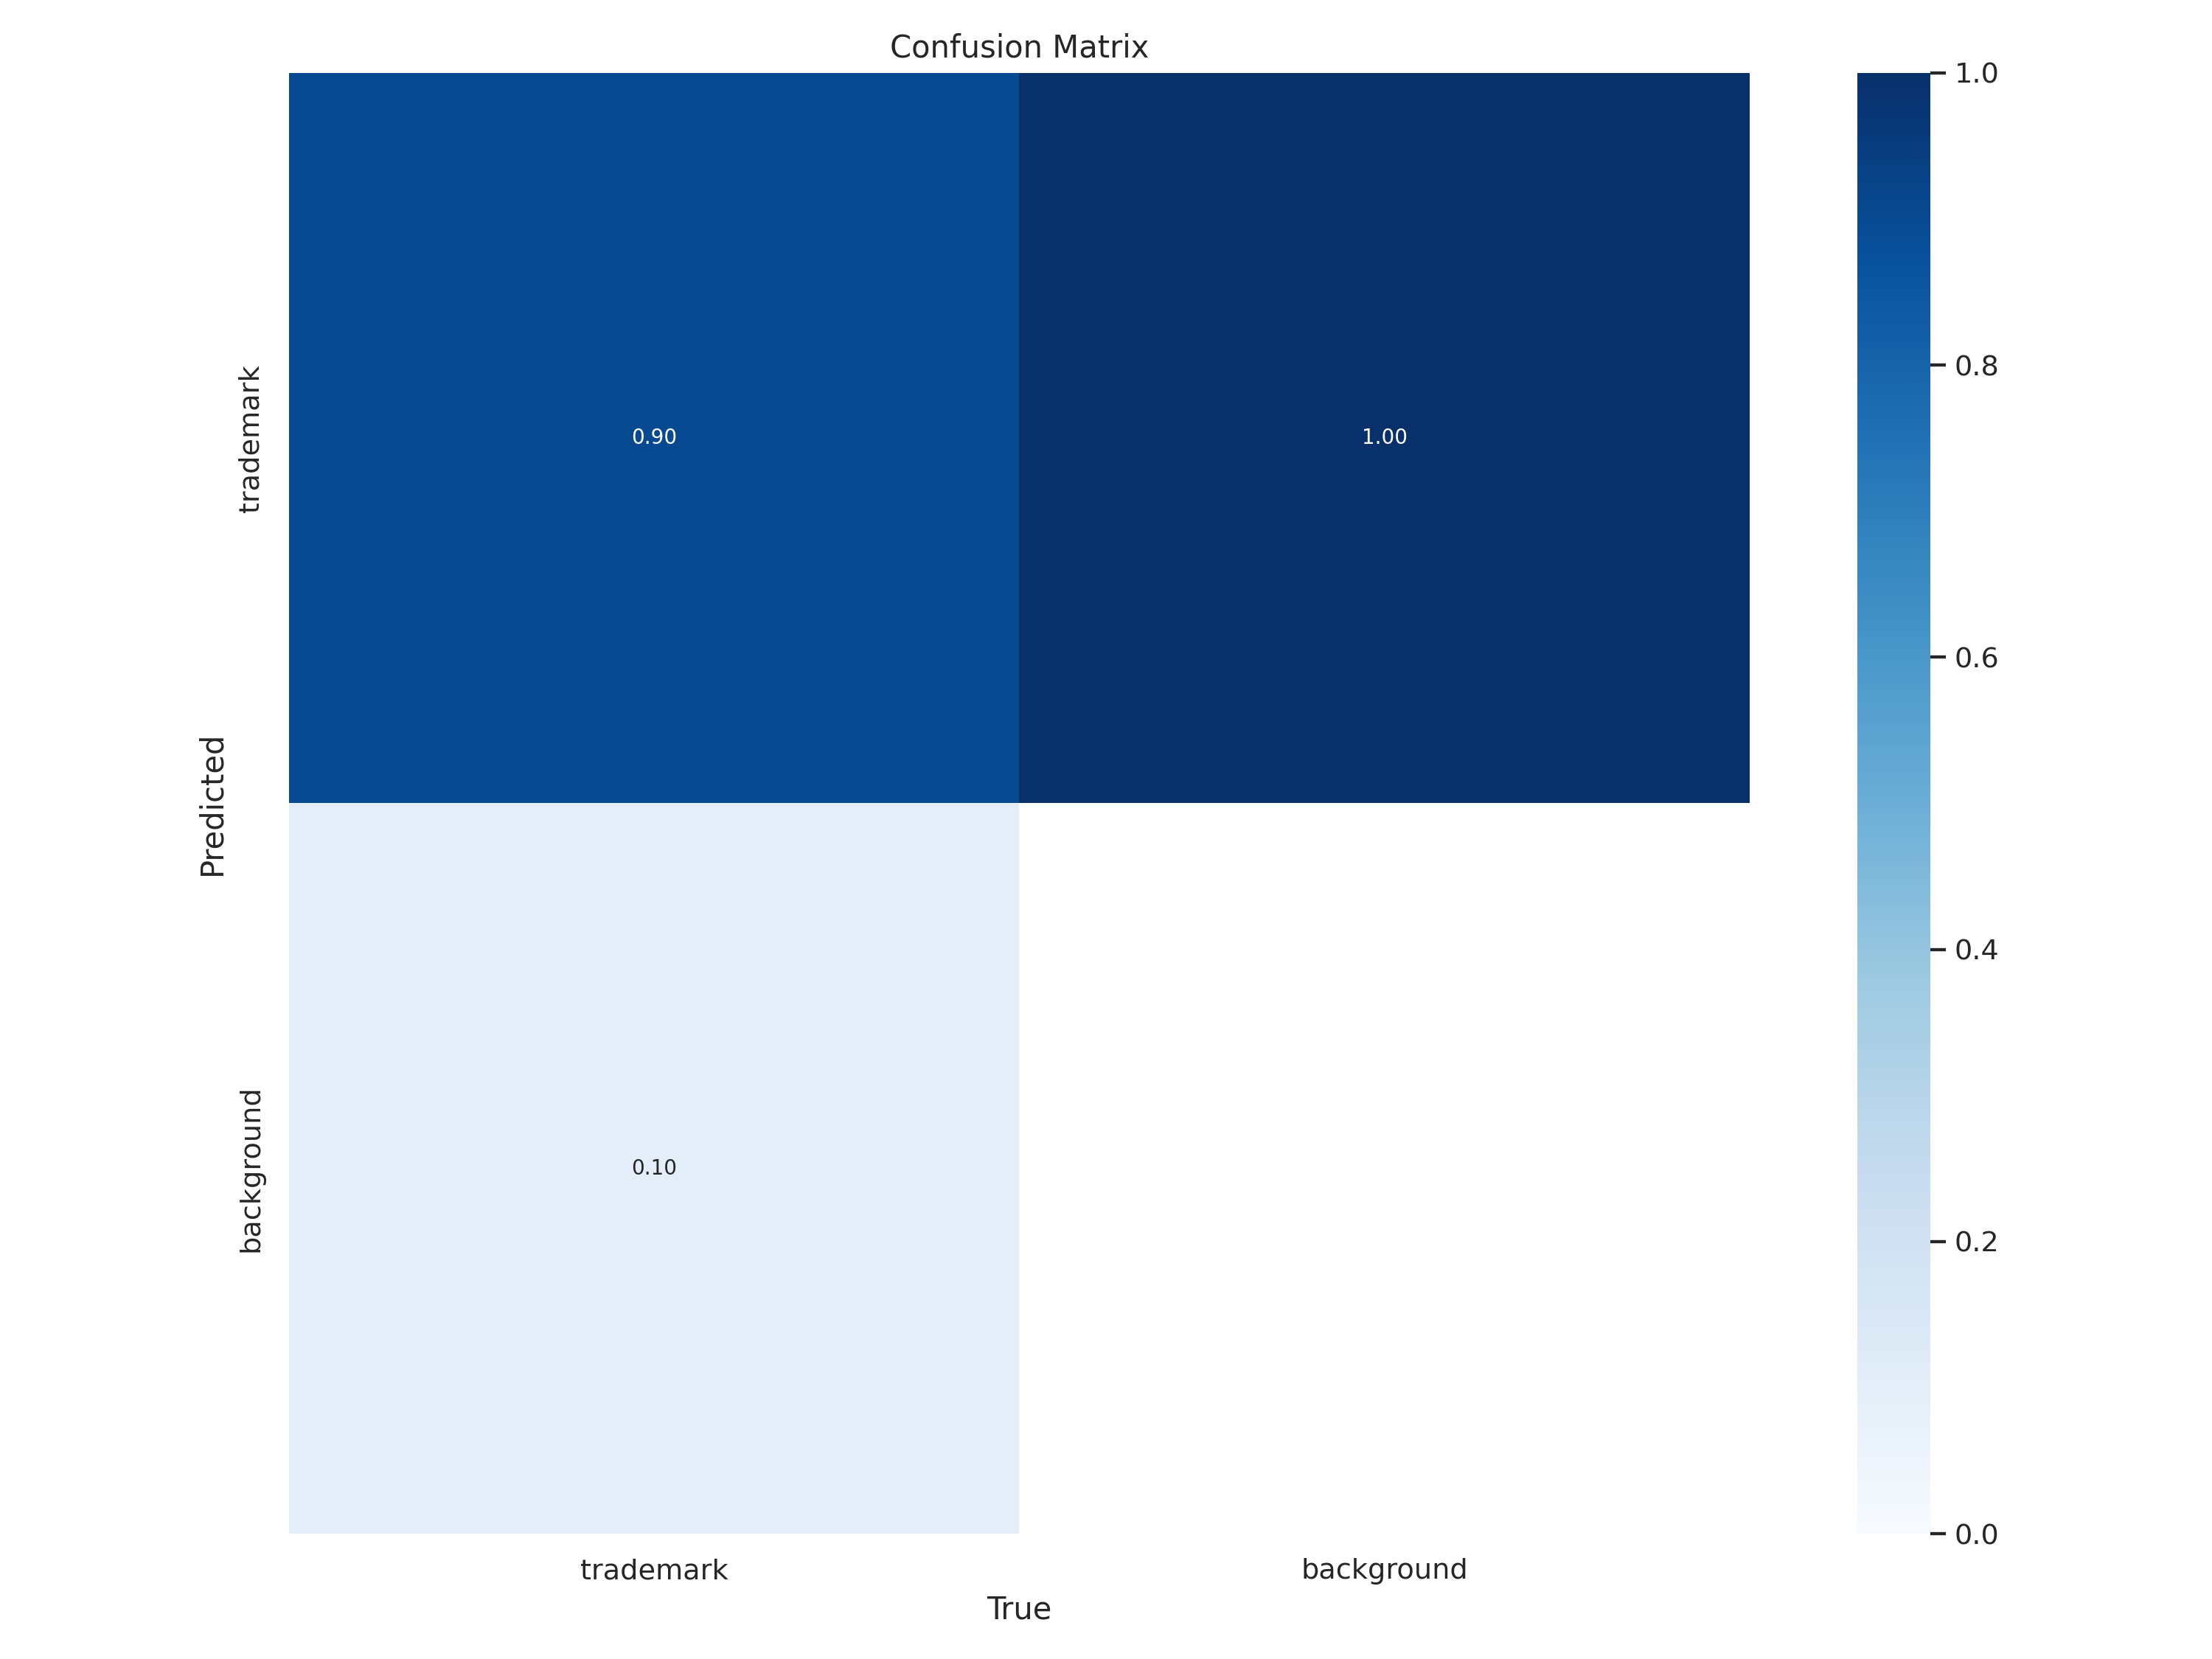

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


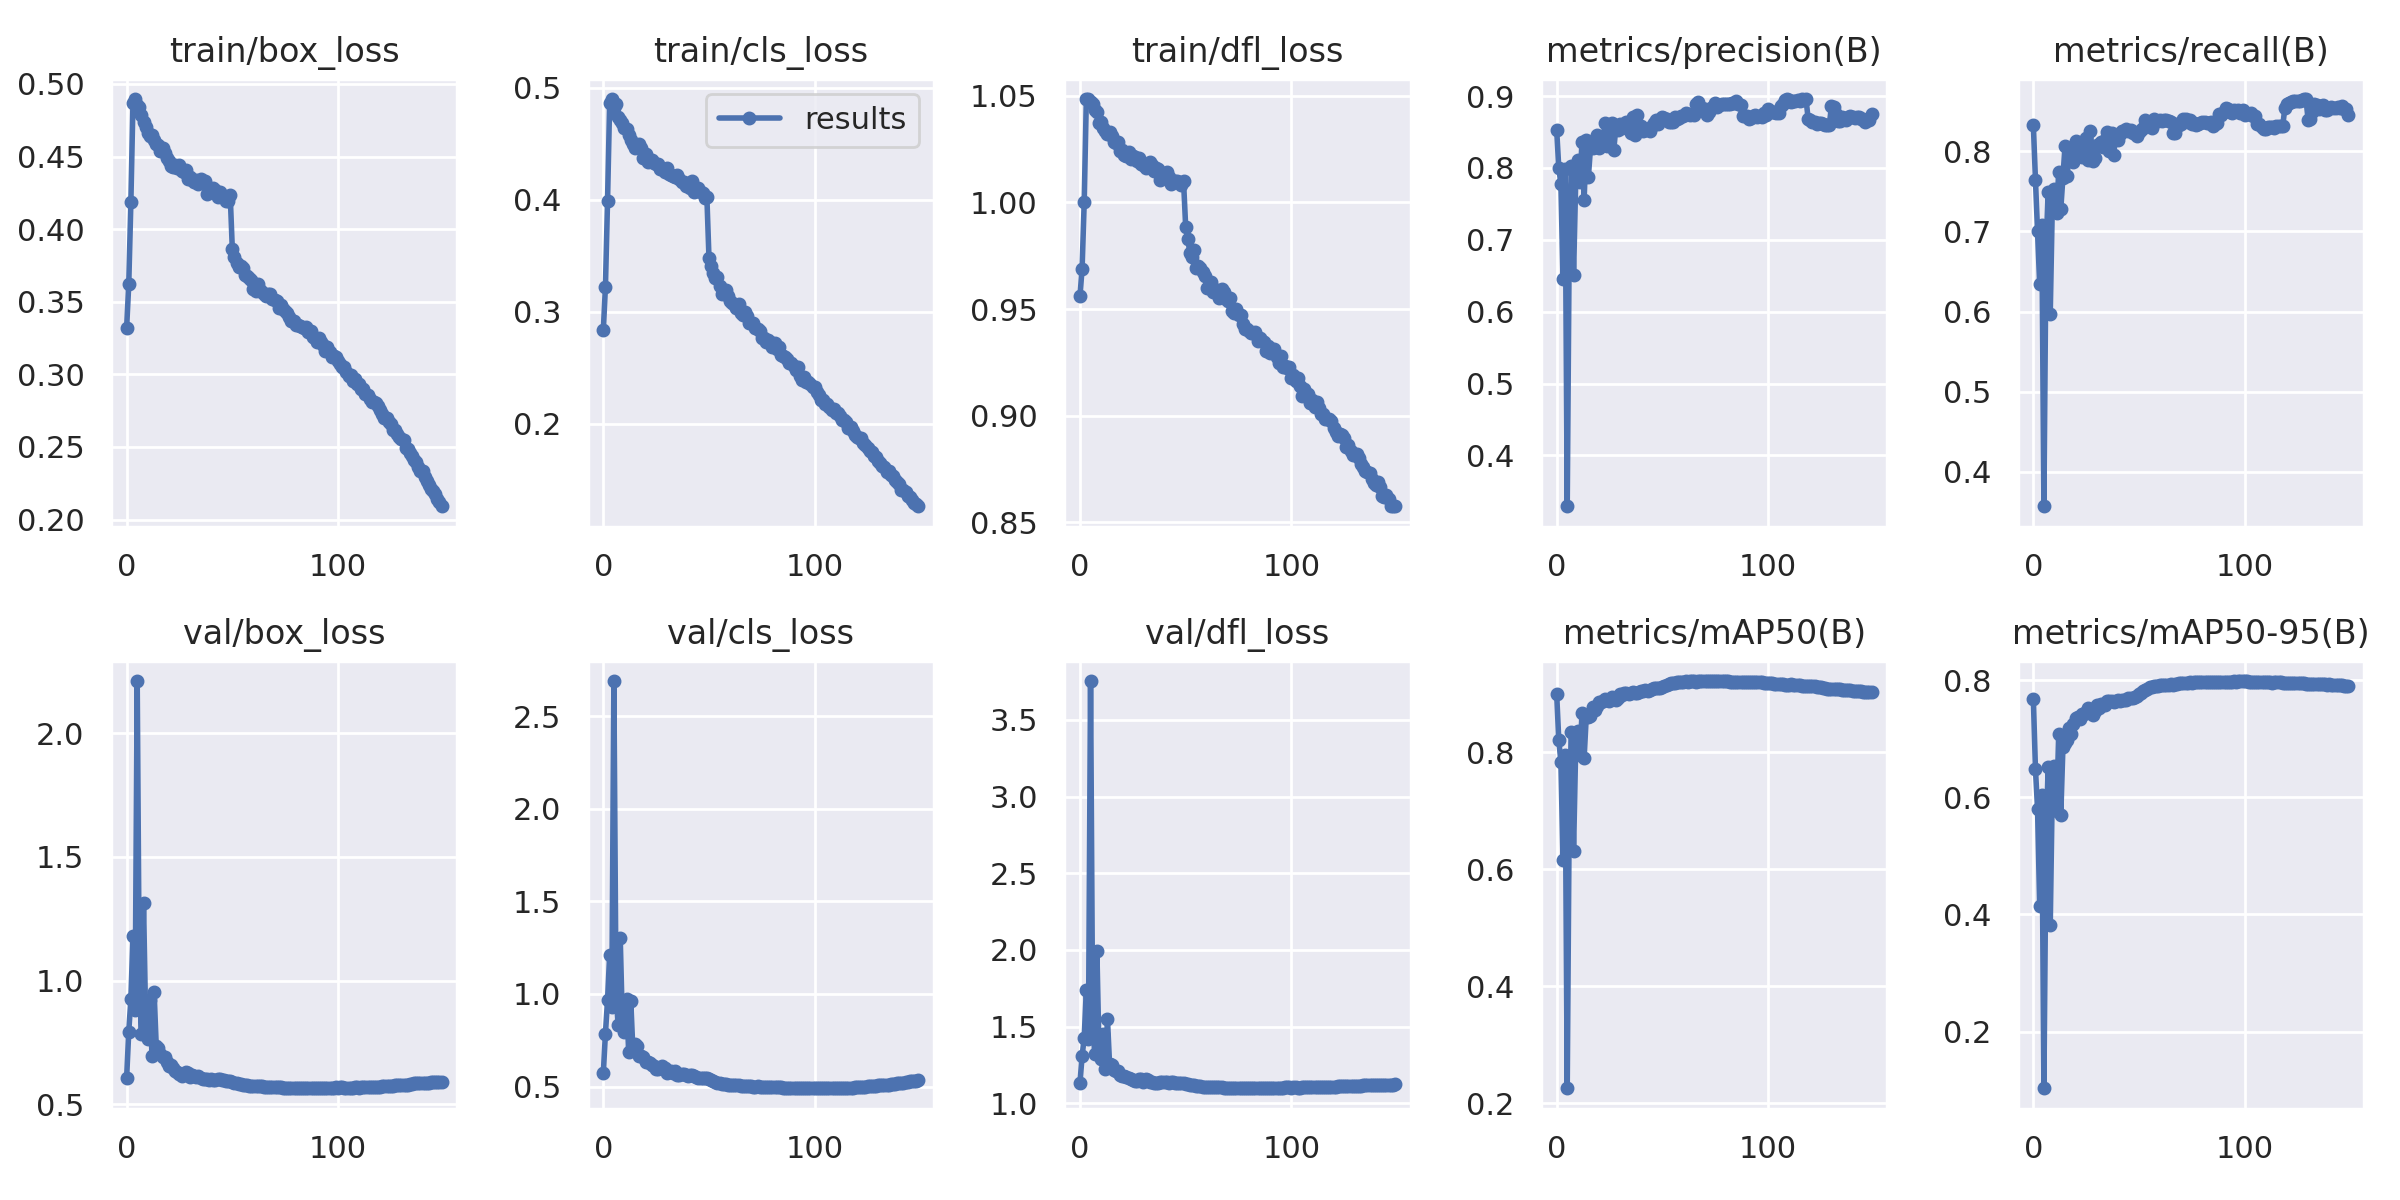

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


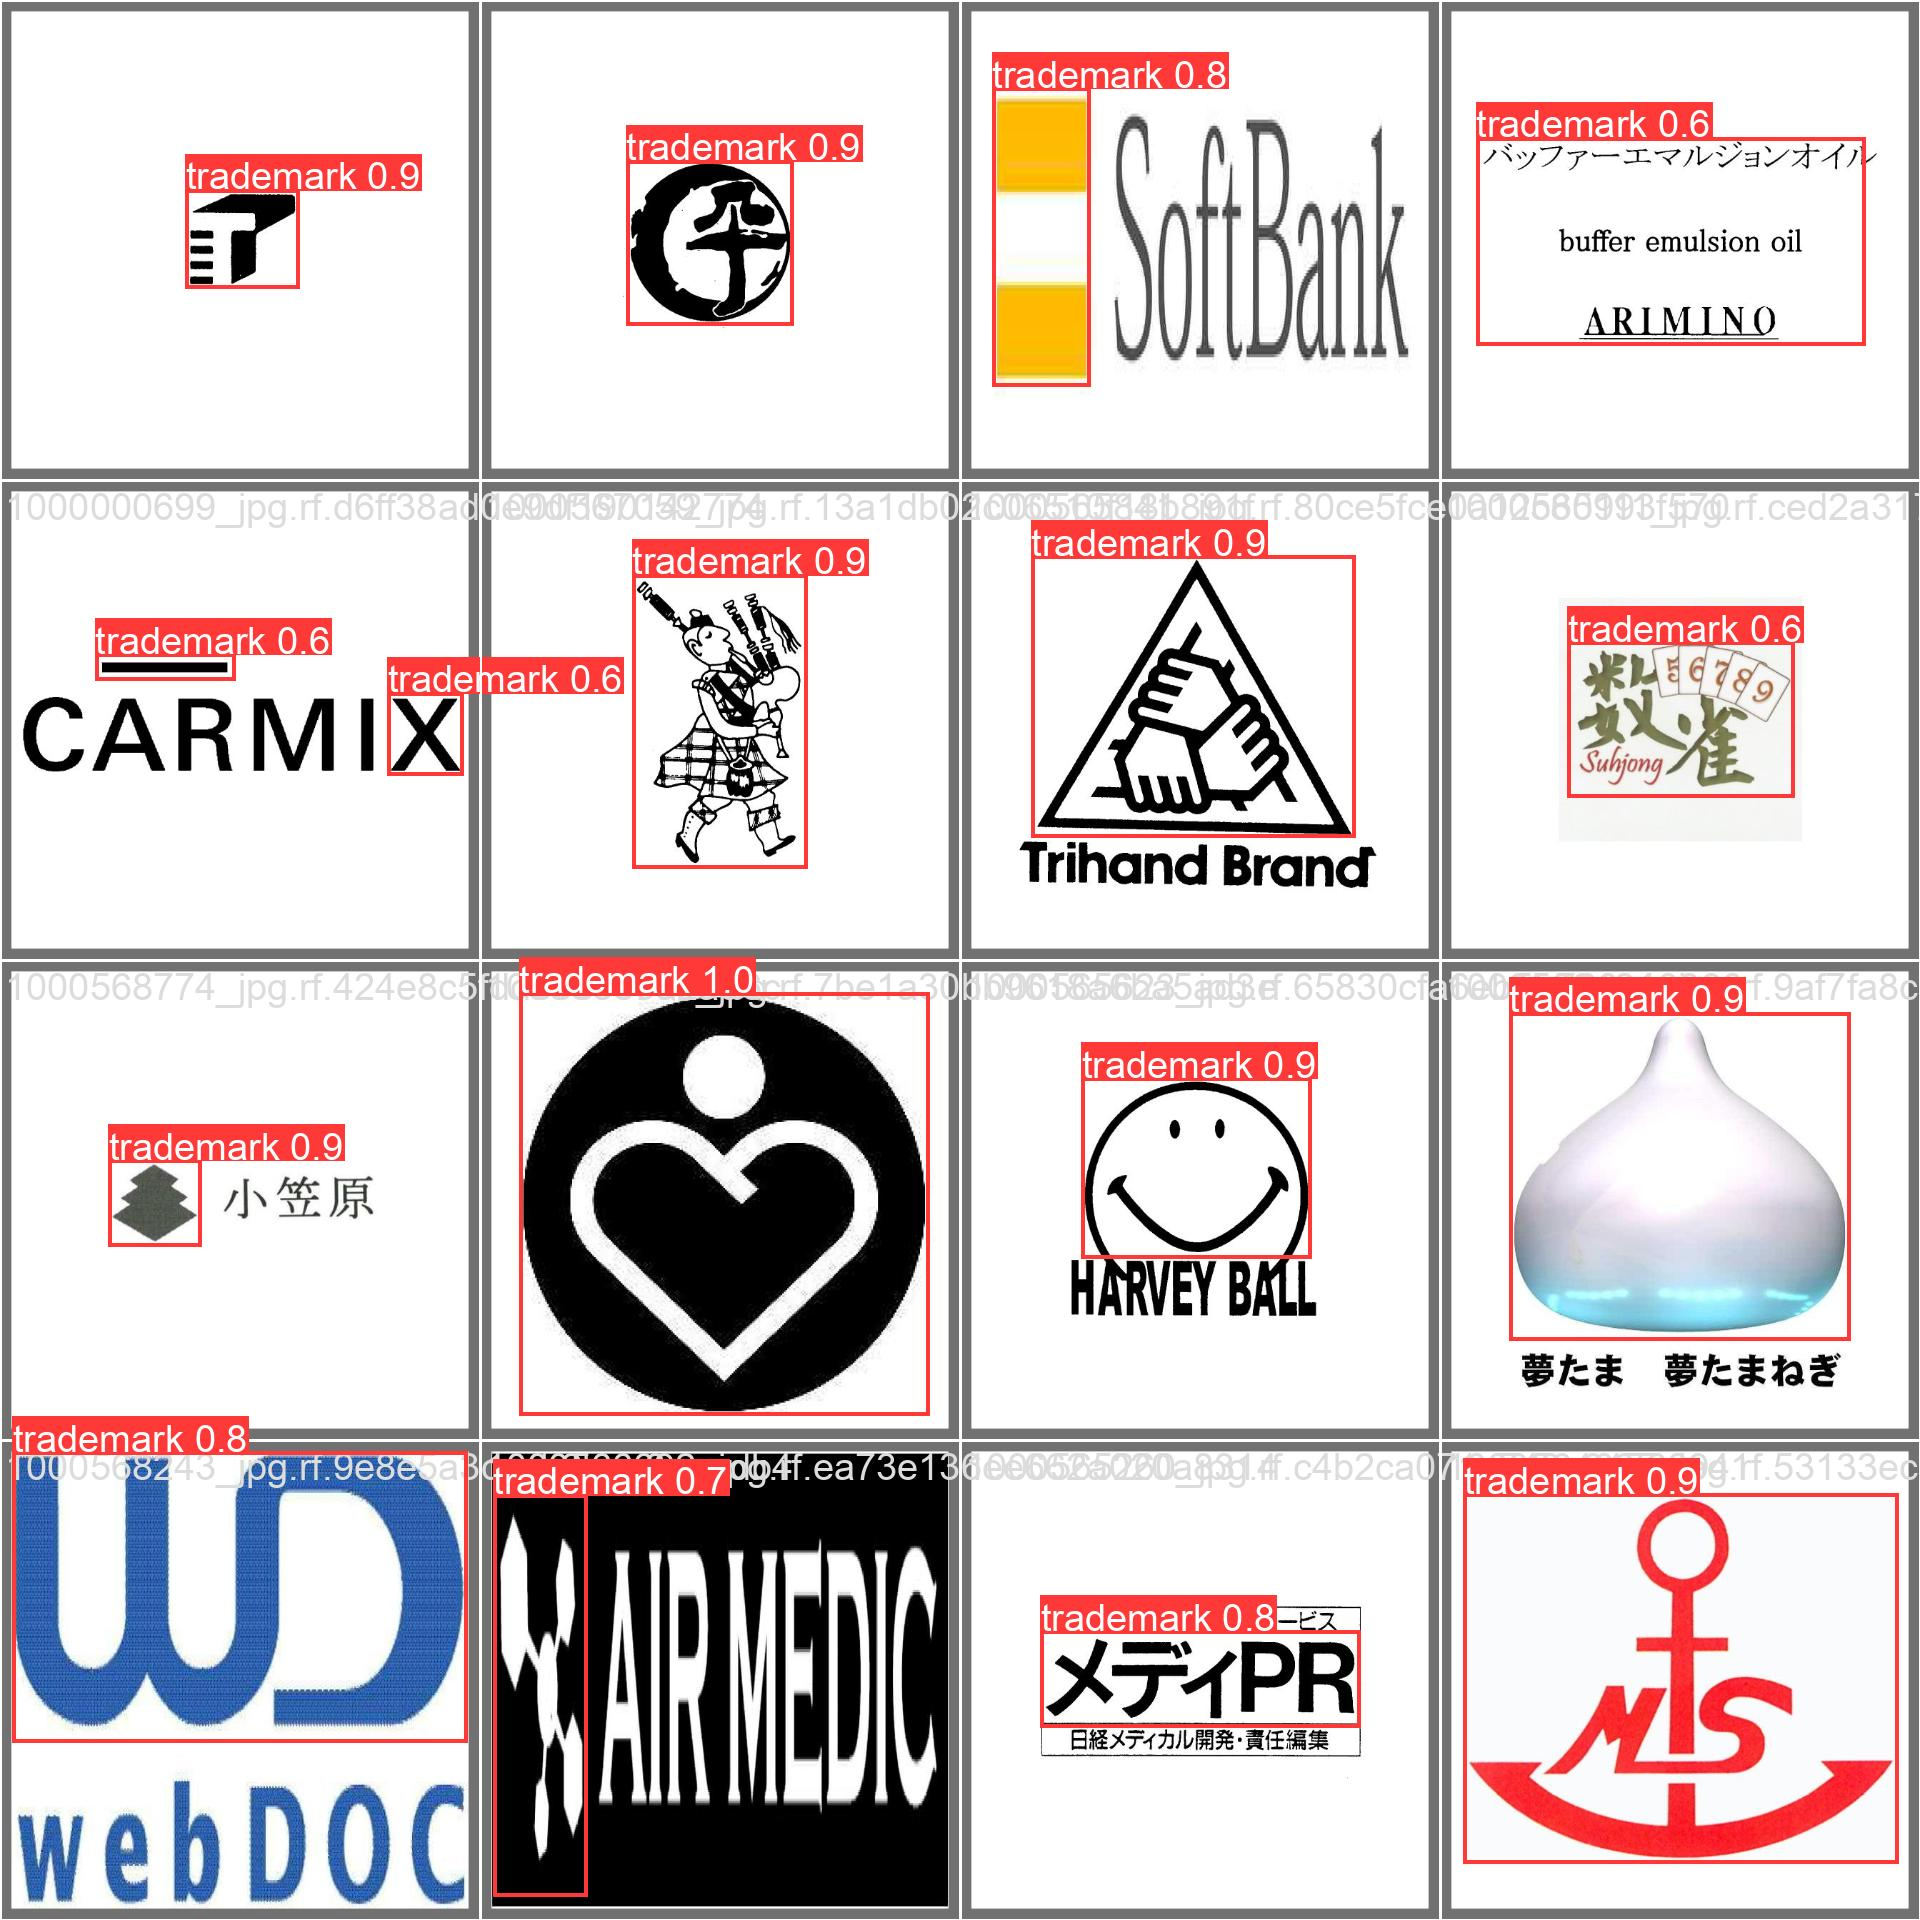

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data=/content/datasets/trademark-logo-detection-3/data.yaml

/content
2023-11-13 20:35:42.628140: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 20:35:42.628194: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 20:35:42.628221: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-13 20:35:42.635993: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 20:35:43.762486: W tensorflow/

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/datasets/trademark-logo-detection-3/test/images save=True

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

i = 0
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg'):#[:50]:
      display(Image(filename=image_path, width=600))
      if i == 50:
        break
      print("\n")
      i += 1

# You should save models to your colab directory

In [ ]:
%cd /content/

In [ ]:
!ls

In [ ]:
!mkdir /content/yolov8_trained

In [ ]:
!cp -r datasets runs yolov8s.pt /content/yolov8_trained/

In [ ]:
!zip -r /content/yolov8_trained_v3_01.zip /content/yolov8_trained

In [ ]:
!cp -r /content/yolov8_trained_v3_01.zip your_directory # TODO: plese write your path you want to save

In [ ]:
!cp /content/runs/detect/train/weights/best.pt yourmodel.pt # TODO: plese write your path you want to save